Machine Learning Tutorial - Basic sklearn Random Forest model  
https://www.youtube.com/watch?v=s7vsF2bzQX8

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('./Iter6/HWM_Combined_Opt_DEM.csv')
# data.describe()

# Where the roughness calibration results in 0.3 or 0.005, this is likely an error related to flows
# We drop these data
data = data[data.roughness < 0.2999]
data = data[data.roughness > 0.0051]

# Add a bias term 
data = pd.concat([pd.Series(1, index=data.index, name='Bias'), data], axis=1)

# Convert data types into forms usable for regression
data.Avg_Elev = data.Avg_Elev.astype(float)
data.Majority_Land_Use = data.Majority_Land_Use.astype(str)
data.StreamOrde = data.StreamOrde.astype(str)

X = data.drop(columns='roughness')   # all data but roughness is the input
X = pd.get_dummies(data=X) # turns categorical data into a form that regression can interpret
# X = X.drop(columns=['fmax','COMID','RMSE']) #, 'Avg_Lon','Avg_Lat'])   # all data but roughness is the input
X = X.drop(columns=['fmax','COMID','RMSE','Predict_Stream_H_m','Stream_H_m'])


# Stream_H_m COMID StreamOrde fmax Predict_Stream_H_m roughness RMSE Majority_Land_Use \
# Avg_Lon Avg_Lat Avg_Elev RunoffC SLOPE LENGTHKM AREASQKM

y = data.roughness # only roughness is the target
# X

In [4]:
X

,Bias,Avg_Lon,Avg_Lat,Avg_Elev,RunoffC,SLOPE,LENGTHKM,AREASQKM,StreamOrde_1,StreamOrde_2,...,Majority_Land_Use_21,Majority_Land_Use_22,Majority_Land_Use_23,Majority_Land_Use_24,Majority_Land_Use_31,Majority_Land_Use_41,Majority_Land_Use_81,Majority_Land_Use_82,Majority_Land_Use_90,Majority_Land_Use_95
0,1,-74.758858,40.204768,10.04841,79.744636,0.000333,2.880,5.9562,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,-74.756324,40.227247,20.31520,78.577370,0.002625,3.543,7.4619,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,-74.731675,40.242883,18.36651,72.921463,0.000560,2.874,3.1284,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,-74.675926,40.266704,20.12826,68.896515,0.000766,4.101,7.7400,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,-75.221468,39.451138,21.54463,62.688126,0.000339,1.092,3.1455,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,1,-74.590344,40.547132,14.61726,72.884499,0.000010,0.877,1.5039,0,0,...,0,0,1,0,0,0,0,0,0,0
177,1,-74.595200,40.561243,17.61549,65.168068,0.000010,1.869,2.0349,1,0,...,0,1,0,0,0,0,0,0,0,0
180,1,-74.574417,40.540493,13.09026,66.671196,0.000010,1.823,1.9872,0,0,...,0,1,0,0,0,0,0,0,0,0
181,1,-74.550166,40.550904,8.68687,80.133331,0.002349,0.298,0.0675,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

# X, y = make_regression(n_features=4, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=20, \
                             random_state=1,\
                             verbose=1) # 

regr.fit(X_train, y_train)


C:\Users\David\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=1,
                      warm_start=False)

In [7]:
regr.score(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8162766885500796

In [8]:
regr.score(X_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


-0.6128714582982808

In [16]:
import numpy as np
import time
regr.feature_importances_

start_time = time.time()
importances = regr.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in regr.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.001 seconds


In [21]:
X.columns

Index(['Stream_H_m', 'StreamOrde', 'fmax', 'Predict_Stream_H_m', 'RMSE',
       'Majority_Land_Use', 'Avg_Lon', 'Avg_Lat', 'Avg_Elev', 'RunoffC',
       'SLOPE', 'LENGTHKM', 'AREASQKM'],
      dtype='object')

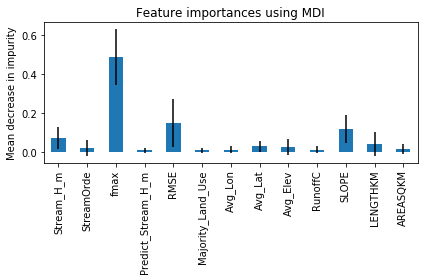

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()